# Data Cleaning

Libraries Required:
    Numpy
    Matplotlib
    Seaborn
    statsmodels.api

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

Import csv file of traffic accident data filtered to San Antonio, TX. Explore data, look for missing values.

In [43]:
df = pd.read_csv('SA_Accidents.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6862 entries, 0 to 6861
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6862 non-null   int64  
 1   ID                     6862 non-null   object 
 2   Severity               6862 non-null   int64  
 3   Start_Time             6862 non-null   object 
 4   End_Time               6862 non-null   object 
 5   Start_Lat              6862 non-null   float64
 6   Start_Lng              6862 non-null   float64
 7   End_Lat                6862 non-null   float64
 8   End_Lng                6862 non-null   float64
 9   Distance(mi)           6862 non-null   float64
 10  Description            6862 non-null   object 
 11  Number                 508 non-null    float64
 12  Street                 6862 non-null   object 
 13  Side                   6862 non-null   object 
 14  City                   6862 non-null   object 
 15  Coun

About half the street number entries are missing, we can drop this column

In [45]:
df.drop('Number', axis=1, inplace=True)

We can drop other irrelevant columns: State, Country, Timezone, Airport_Code are unneccesary since we are working within the city of San Antonio only.

In [46]:
df.drop(['State', 'Timezone','Airport_Code','Country'], axis=1, inplace=True)
df.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,11842,A-11843,2,2016-12-01 01:20:05,2016-12-01 07:20:05,29.48945,-98.57804,29.48934,-98.56893,0.548,At Callaghan Rd/Exit 14 - Accident.,I-410 E,R,San Antonio,Bexar,78229,2016-12-01 00:51:00,46.0,NaN,58.0,30.05,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,11869,A-11870,3,2016-12-01 08:29:50,2016-12-01 14:29:50,29.36648,-98.44903,29.37038,-98.45357,0.384,At Hot Wells Blvd - Accident.,I-37 N,R,San Antonio,Bexar,78223,2016-12-01 08:53:00,53.1,NaN,45.0,30.11,10.0,East,8.1,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,11908,A-11909,2,2016-12-01 15:53:25,2016-12-01 21:53:25,29.46405,-98.62101,29.45018,-98.63250,1.182,At Culebra Rd/Exit 10 - Accident.,I-410 S,R,San Antonio,Bexar,78238,2016-12-01 15:58:00,70.0,NaN,35.0,29.96,10.0,ESE,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,11918,A-11919,2,2016-12-01 17:04:57,2016-12-01 23:04:57,29.48933,-98.56837,29.48941,-98.56360,0.287,At Babcock Rd/Exit 14 - Accident.,I-410 E,R,San Antonio,Bexar,78229,2016-12-01 16:51:00,66.0,NaN,38.0,29.96,10.0,East,5.8,NaN,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,11933,A-11934,2,2016-12-01 19:06:27,2016-12-02 01:06:27,29.39609,-98.50151,29.39587,-98.49417,0.442,At TX-536-SPUR/Probandt St/Exit 573 - Accident.,US-87 S,R,San Antonio,Bexar,78204,2016-12-01 18:53:00,63.0,NaN,56.0,29.98,10.0,ESE,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


Let's explore the columnal data and see if any data changes occur so infrequently that they aren't helpful to our analysis.

In [47]:
pd.set_option("display.max_columns", None)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,6862.0,NaN,NaN,NaN,1383525.029583,821061.613873,11842.0,663148.0,1466163.5,2044347.5,2845059.0
ID,6862,6862,A-11843,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severity,6862.0,NaN,NaN,NaN,2.199067,0.490111,1.0,2.0,2.0,2.0,4.0
Start_Time,6862,6353,2021-10-26 05:44:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Time,6862,6614,2018-09-17 06:18:07,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Lat,6862.0,NaN,NaN,NaN,29.439486,0.2055,28.308238,29.407114,29.460085,29.520466,29.719223
Start_Lng,6862.0,NaN,NaN,NaN,-98.047716,2.705078,-98.7733,-98.56295,-98.503965,-98.45364,-82.273622
End_Lat,6862.0,NaN,NaN,NaN,29.439187,0.206127,28.23249,29.40696,29.459511,29.520425,29.720401
End_Lng,6862.0,NaN,NaN,NaN,-98.047676,2.705166,-98.7733,-98.564133,-98.503172,-98.45949,-82.274304
Distance(mi),6862.0,NaN,NaN,NaN,0.69169,0.885673,0.0,0.158,0.46,0.8615,10.397


In [48]:
df.Weather_Timestamp.head(4), df.Start_Time.head(4)

(0    2016-12-01 00:51:00
 1    2016-12-01 08:53:00
 2    2016-12-01 15:58:00
 3    2016-12-01 16:51:00
 Name: Weather_Timestamp, dtype: object,
 0    2016-12-01 01:20:05
 1    2016-12-01 08:29:50
 2    2016-12-01 15:53:25
 3    2016-12-01 17:04:57
 Name: Start_Time, dtype: object)

Weather start time is not needed, we can drop this column

In [49]:
df.drop('Weather_Timestamp', axis=1, inplace=True)

In [50]:
df['Zipcode'].value_counts()

78249         414
78204         406
78230         369
78207         352
78216         322
             ... 
78221-1318      1
78229-4745      1
78216-5813      1
78216-6523      1
78227-1624      1
Name: Zipcode, Length: 249, dtype: int64

Looks like the zip codes are not input in a consistent manner, we should just keep the first 5 digits so we can get a better idea of traffic accidents per zipcode.

In [52]:
df['Zip'] = df['Zipcode'].str[:5]
df.Zip.head()

0    78229
1    78223
2    78238
3    78229
4    78204
Name: Zip, dtype: object

In [54]:
print(df['Zip'].value_counts())
z = len(pd.unique(df['Zip']))
print("No.of.unique zip codes :", 
      z)

78249    420
78204    409
78230    400
78207    363
78216    328
78233    315
78212    300
78227    279
78219    272
78201    252
78215    231
78218    231
78223    221
78210    214
78229    202
33576    197
78213    164
78238    162
78209    146
78232    127
78257    119
78245    117
78211    110
78208    110
78237    106
78247     97
78217     84
78225     83
78251     80
78220     66
78254     64
78224     60
78242     59
78248     57
78239     55
78222     52
78221     42
78231     42
78258     41
78214     39
78205     25
78252     18
78228     17
78202     16
78253     14
78250     14
78240     11
78264      6
78266      5
78226      4
78259      4
78260      3
78244      3
78203      3
78256      2
78255      1
Name: Zip, dtype: int64
No.of.unique zip codes : 56


In [55]:
df['Street'].value_counts()

Connally Loop        1293
I-10 E                570
I-35 S                519
I-35 N                470
TX-1604               457
                     ... 
Mission Rd              1
 Hatfield St            1
I 37 Access Rd          1
NW Military Hwy         1
 S US Highway 181       1
Name: Street, Length: 337, dtype: int64

Okay, looks like we have quite a few streets that don't have many acccidents, let's filter out streets with less than 10 accidents.

In [56]:
df = df[df.groupby('Street').Street.transform('count')>10].copy() 
df['Street'].value_counts()

Connally Loop         1293
I-10 E                 570
I-35 S                 519
I-35 N                 470
TX-1604                457
I-10 W                 401
US-281 S               242
US-281 N               236
US-90 E                223
US-87 N                148
US-90 W                148
I-37 N                 133
US-87 S                133
I-410 E                121
I-37 S                 111
State Loop 1604 N       94
I-410 W                 85
I-410 N                 67
State Loop 1604 S       63
W Loop 1604 N           63
I-410 S                 60
I-75 N                  60
TX-151 W                59
I-75 S                  51
 State Road 52          51
TX-151 E                49
TX-16 S                 35
W Loop 1604 S           22
NW Loop 410             21
TX-130 S                21
 US Highway 281 N       20
 NE Loop 410            19
 NW Loop 410            17
 W Interstate 10        17
N Loop 1604 W           15
 SW Loop 410            15
Wurzbach Pkwy           15
 

Aha, so now we see that many streets are called by different names or differentiated by directional notations. Unfortunately not all mentions are using directional notations and some are refering to a street by more than one name. We will need to adjust the names so they all use a uniform entry.

In [57]:
df["Street"] = df["Street"].apply(lambda x: x.replace("Conally Loop", "Connally Loop"))

In [58]:
df.loc[df['Street'].str.contains('410', case=False), 'Street'] = 'Connally Loop'
df.loc[df['Street'].str.contains('10', case=False), 'Street'] = 'I-10'
df.loc[df['Street'].str.contains('1604', case=False), 'Street'] = 'TX-1604'
df.loc[df['Street'].str.contains('37', case=False), 'Street'] = 'I-37'
df.loc[df['Street'].str.contains('35', case=False), 'Street'] = 'I-35'
df.loc[df['Street'].str.contains('281', case=False), 'Street'] = 'US-281'
df.loc[df['Street'].str.contains('90', case=False), 'Street'] = 'US-90'
df.loc[df['Street'].str.contains('87', case=False), 'Street'] = 'US-87'
df.loc[df['Street'].str.contains('75', case=False), 'Street'] = 'I-75'
df.loc[df['Street'].str.contains('52', case=False), 'Street'] = 'State Road 52'
df.loc[df['Street'].str.contains('151', case=False), 'Street'] = 'TX-151'
df.Street = df.Street.str.replace(' ','')

We need to make the data easier to sort by year/month/day/hour.

In [59]:
df[["Start_Time","End_Time"]].min(),df[["Start_Time","End_Time"]].max()

(Start_Time    2016-06-21 09:03:12
 End_Time      2016-06-21 15:03:12
 dtype: object,
 Start_Time    2021-12-30 14:06:00
 End_Time      2021-12-30 15:21:27
 dtype: object)

In [60]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['STYear'] = df['Start_Time'].dt.year
df['STMonth'] = df['Start_Time'].dt.month_name()
df['STHour'] = df['Start_Time'].dt.hour
df['DayofWeek'] = df['Start_Time'].dt.day_name()
#
df[['STYear','STMonth','STHour','DayofWeek']].head()
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['ETYear'] = df['End_Time'].dt.year
df['ETMonth'] = df['End_Time'].dt.month_name()
df['ETHour'] = df['End_Time'].dt.hour
#
df[['ETYear','ETMonth','ETHour']].head()

,ETYear,ETMonth,ETHour
0,2016,December,7
1,2016,December,14
2,2016,December,21
3,2016,December,23
4,2016,December,1


We need to investigate the street features.

In [61]:
street_features=df[["Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]]
street_features.mean()

Amenity            0.000485
Bump               0.000000
Crossing           0.005982
Give_Way           0.003234
Junction           0.209378
No_Exit            0.000162
Railway            0.003557
Roundabout         0.000000
Station            0.000647
Stop               0.000000
Traffic_Calming    0.000000
Traffic_Signal     0.038319
Turning_Loop       0.000000
dtype: float64

Looks like we can drop several of these columns, they don't appear to have any correlation with this data set.

In [62]:
errors='ignore'
df.drop(['Bump', 'No_Exit','Roundabout','Stop','Traffic_Calming','Turning_Loop'], axis=1, inplace=True)

The last set of columns to explore are sunset and twilight. Do we need these?

In [63]:
twilight = df[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']]
twilight.value_counts()

Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  Astronomical_Twilight
Day             Day             Day                Day                      4018
Night           Night           Night              Night                    1529
                                Day                Day                       229
                Day             Day                Day                       213
                Night           Night              Day                       196
dtype: int64

Looks like these are just day or night values. We don't need to keep all of this. We will drop all but Sunrise_Sunset.

In [64]:
df.drop(['Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1, inplace=True)
for col in df.columns:
    print(col)

Unnamed: 0
ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Street
Side
City
County
Zipcode
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Crossing
Give_Way
Junction
Railway
Station
Traffic_Signal
Sunrise_Sunset
Zip
STYear
STMonth
STHour
DayofWeek
ETYear
ETMonth
ETHour


In [65]:
df.value_counts('Weather_Condition')

Weather_Condition
Fair                            1993
Mostly Cloudy                   1139
Cloudy                           820
Partly Cloudy                    746
Clear                            310
Light Rain                       293
Overcast                         256
Scattered Clouds                 192
Light Rain with Thunder           51
Rain                              44
Light Drizzle                     42
Fog                               39
Thunder                           30
T-Storm                           26
Heavy Rain                        23
Mostly Cloudy / Windy             23
Heavy T-Storm                     19
Haze                              16
Fair / Windy                      15
Cloudy / Windy                    11
Light Rain / Windy                 8
Thunderstorms and Rain             6
Light Thunderstorms and Rain       5
Heavy T-Storm / Windy              5
Thunder / Windy                    4
Light Snow                         3
Wintry Mix          

We can clean this up and combine similar values.
We don't need to keep windy since we can see the wind speed already. We can combine instead on what we see most commonly: Cloudy, Fair, Rain, etc

In [66]:
df.loc[df['Weather_Condition'].str.contains('Cloudy', na=False), 'Weather_Condition'] = 'Cloudy'
df.loc[df['Weather_Condition'].str.contains('Clouds', na=False), 'Weather_Condition'] = 'Cloudy'
df.loc[df['Weather_Condition'].str.contains('Overcast', na=False), 'Weather_Condition'] = 'Cloudy'
df.loc[df['Weather_Condition'].str.contains('Fair', na=False), 'Weather_Condition'] = 'Fair'
df.loc[df['Weather_Condition'].str.contains('Clear', na=False), 'Weather_Condition'] = 'Fair'
df.loc[df['Weather_Condition'].str.contains('Rain', na=False), 'Weather_Condition'] = 'Rain'
df.loc[df['Weather_Condition'].str.contains('Drizzle', na=False), 'Weather_Condition'] = 'Rain'
df.loc[df['Weather_Condition'].str.contains('Fog', na=False), 'Weather_Condition'] = 'Fog'
df.loc[df['Weather_Condition'].str.contains('Ice', na=False), 'Weather_Condition'] = 'Ice/WinterMix'
df.loc[df['Weather_Condition'].str.contains('Wint', na=False), 'Weather_Condition'] = 'Ice/WinterMix'
df.loc[df['Weather_Condition'].str.contains('Snow', na=False), 'Weather_Condition'] = 'Ice/WinterMix'
df.loc[df['Weather_Condition'].str.contains('Thunder', na=False), 'Weather_Condition'] = 'T-Storm'
df.loc[df['Weather_Condition'].str.contains('T-Storm', na=False), 'Weather_Condition'] = 'T-Storm'
df.loc[df['Weather_Condition'].str.contains('Dust', na=False), 'Weather_Condition'] = 'Haze'
df.value_counts('Weather_Condition')

Weather_Condition
Cloudy           3189
Fair             2318
Rain              479
T-Storm            87
Fog                41
Haze               17
Ice/WinterMix       6
Mist                1
Smoke               1
Squalls             1
dtype: int64

Our dataframe is much more manageable now. Let's get to exploring!

# Data Exploration

**Atmospheric Exploration**

Does wind direction play a large factor? Let's see if there's any evidence here.

In [67]:
df.Wind_Direction.value_counts()

SSE         760
SE          723
CALM        559
ESE         437
S           433
E           356
N           344
NNE         321
ENE         272
NE          271
NNW         219
NW          174
WNW         160
SSW         158
VAR         153
South       133
Calm        130
North       116
SW           93
W            91
East         90
WSW          65
Variable     45
West         30
Name: Wind_Direction, dtype: int64

Looks like SSE and SE winds are more prevalent during accidents than any other direction or calm. Though it's worth noting that wind directionin San Antonio is often from S and SE for 10 months of the year. https://weatherspark.com/y/7137/Average-Weather-in-San-Antonio-Texas-United-States-Year-Round#:~:text=The%20predominant%20average%20hourly%20wind,of%2076%25%20on%20July%2016.

What streets see the most accidents?

In [68]:
df['Street'].value_counts()

ConnallyLoop        1709
I-35                 989
I-10                 988
TX-1604              714
US-281               498
US-90                371
US-87                281
I-37                 244
I-75                 111
TX-151               108
StateRoad52           65
TX-16S                35
TX-130S               21
WurzbachPkwy          15
FredericksburgRd      14
BabcockRd             11
McKinleyAve           11
Name: Street, dtype: int64

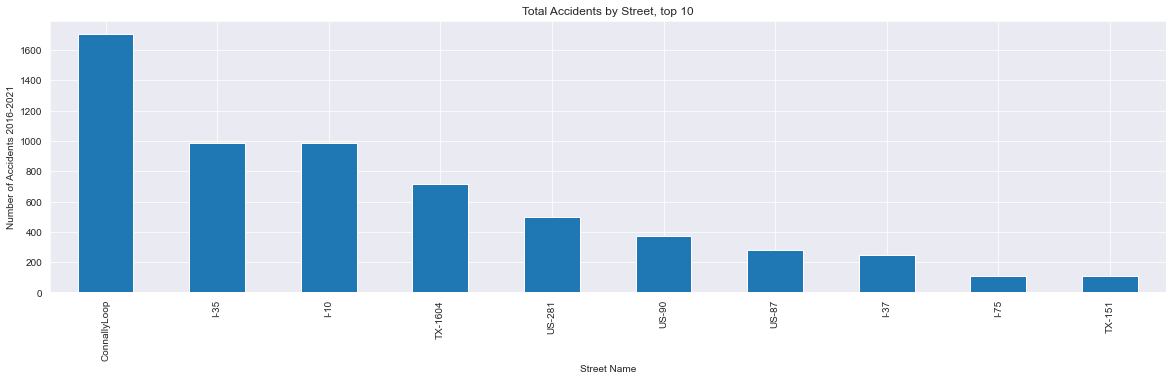

In [69]:
df["Street"].value_counts().head(10).plot(kind="bar")
plt.title("Total Accidents by Street, top 10")
plt.xlabel("Street Name")
plt.ylabel("Number of Accidents 2016-2021")
plt.show()

How do atmospheric conditions effect accidents?

In [70]:
df[["Distance(mi)","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]].mean()

Distance(mi)          0.739180
Temperature(F)       71.729757
Wind_Chill(F)        70.690090
Humidity(%)          65.278477
Pressure(in)         29.386765
Visibility(mi)        9.412146
Wind_Speed(mph)       8.269977
Precipitation(in)     0.008258
dtype: float64

This is only relevant if it varies from the mean for San Antonio in general. Let's check what's typical-
Temperature(F)       69.8 °F
Wind_Chill(F)        data not available
Humidity(%)          67%-57%
Pressure(in)         30.01
Visibility(mi)       data not available
Wind_Speed(mph)      9.2-8.1
Precipitation(in)    34.9 inch.

Summary- Weather conditions for traffic incidents don't appear to diverge from the annual data available. 


Annual Weather Data: https://en.climate-data.org/north-america/united-states-of-america/texas/san-antonio-417/, https://weatherspark.com/y/7137/Average-Weather-in-San-Antonio-Texas-United-States-Year-Round, https://www.localconditions.com/weather-san-antonio-texas/78201/

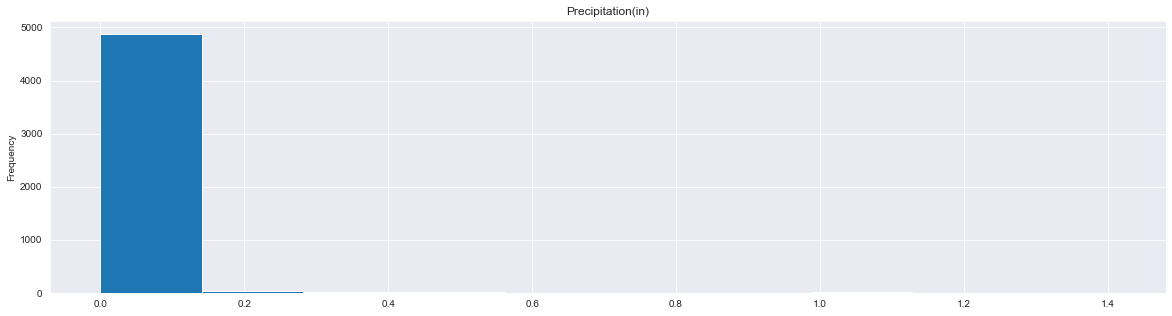

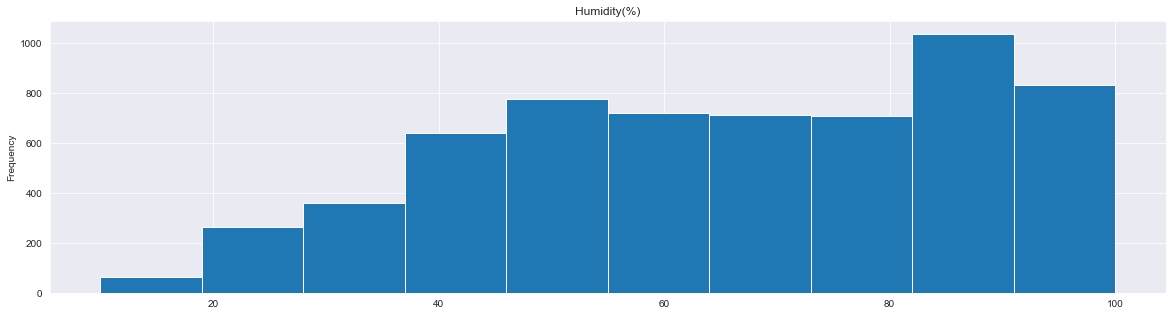

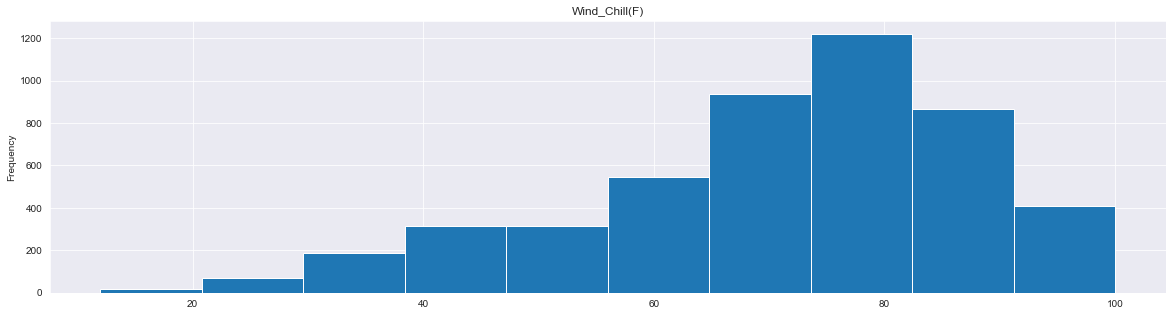

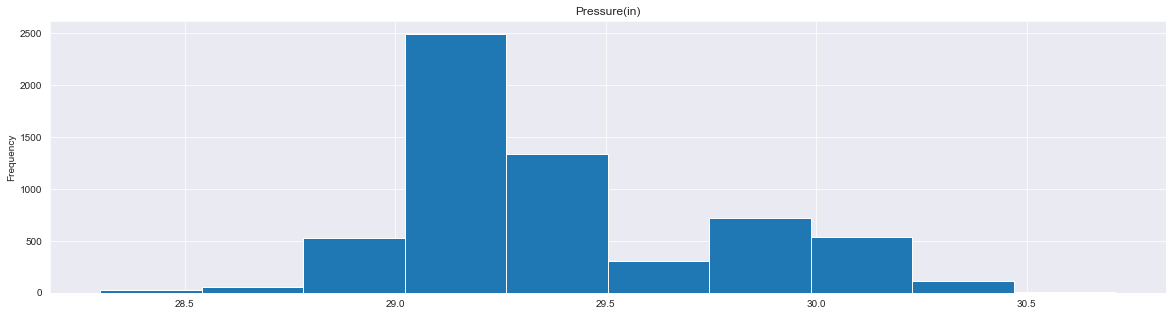

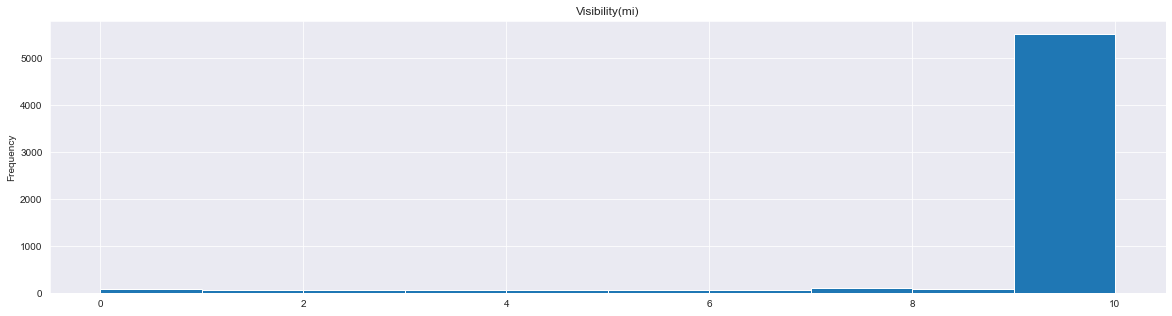

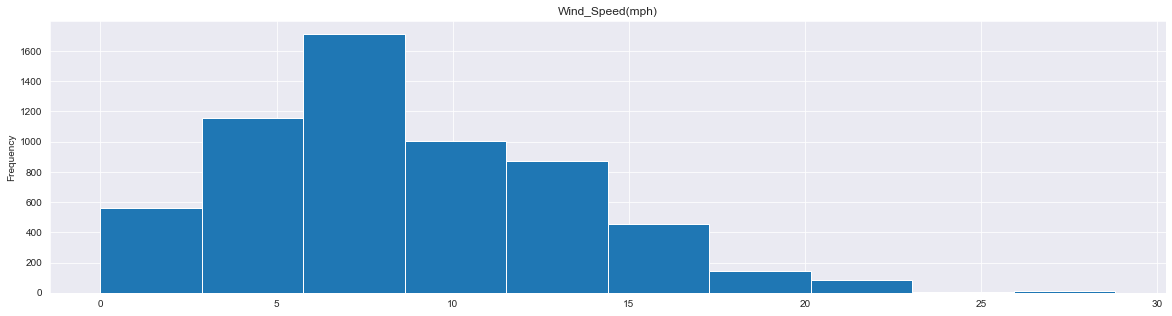

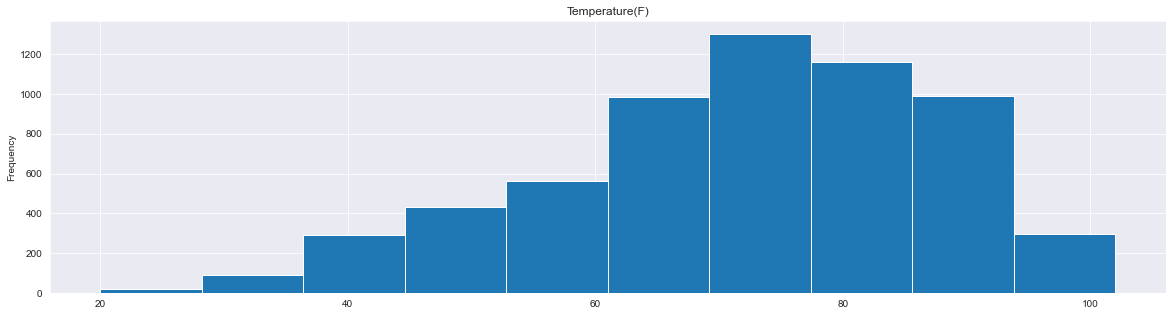

In [71]:
ListOfVariables = ["Precipitation(in)", "Humidity(%)", "Wind_Chill(F)", "Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Temperature(F)"]
for item in ListOfVariables:
    first_axis = df[item].plot(kind='hist')
    plt.title(item)
    plt.show()

We know what range of atmospheric variables occur most often, how do they vary across different months?

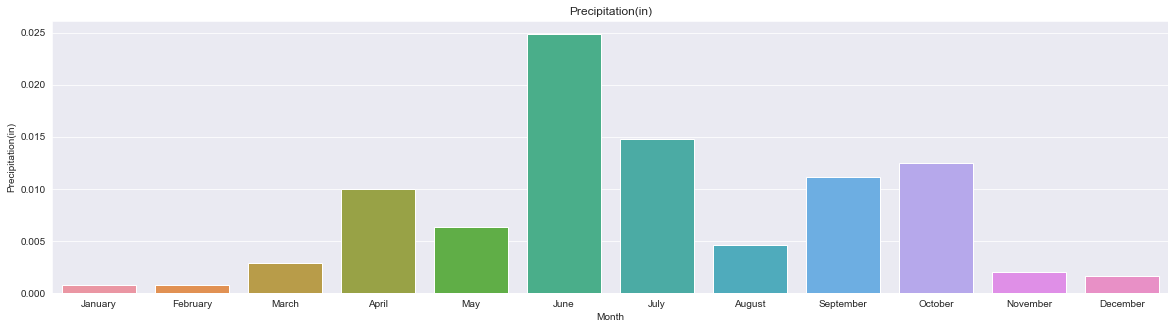

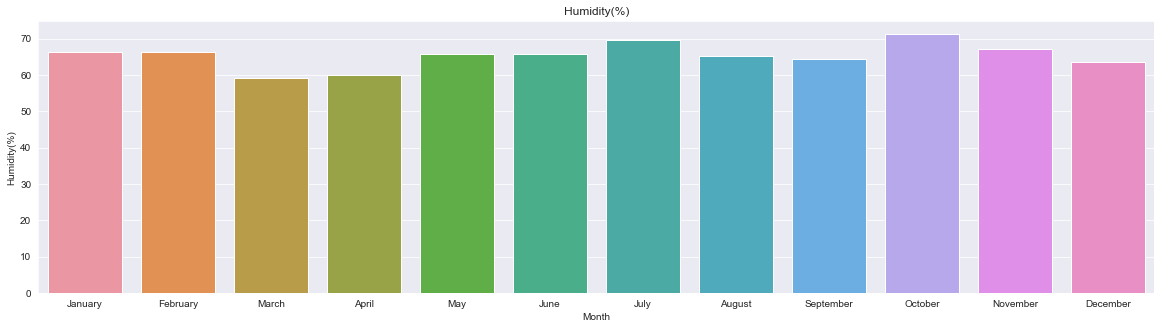

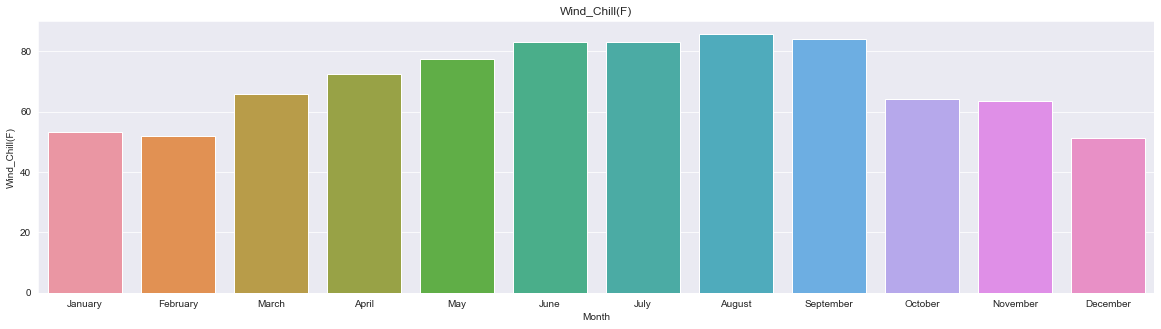

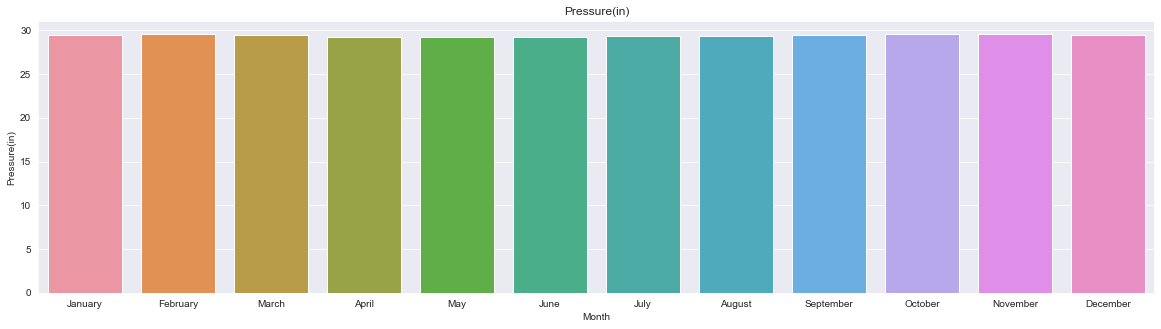

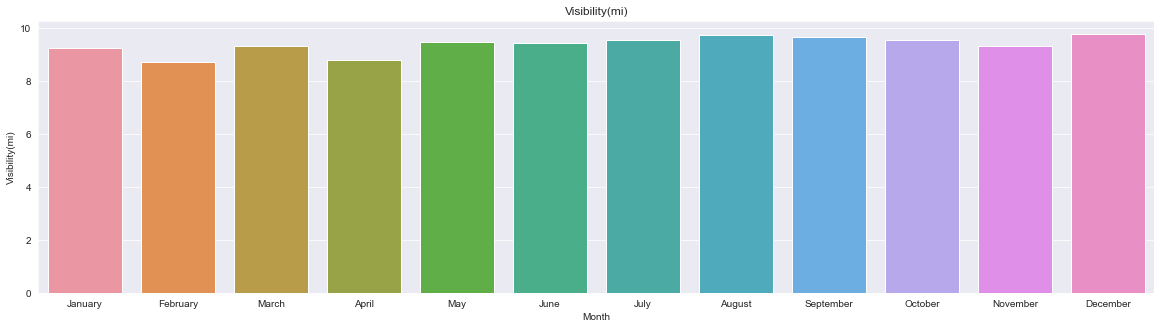

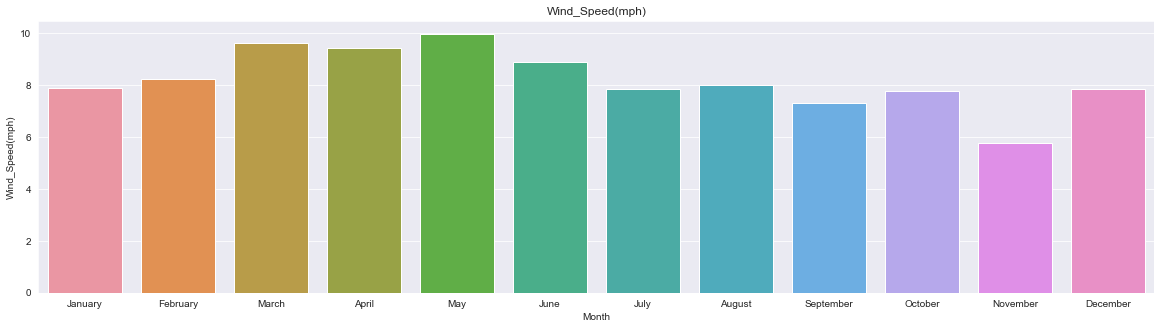

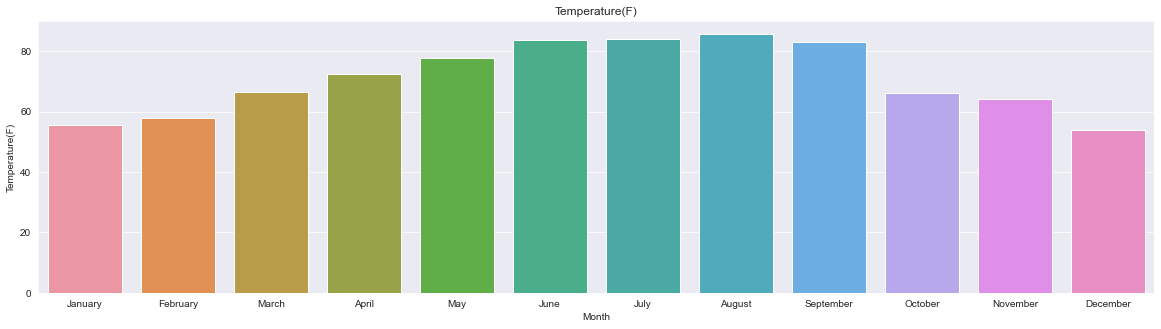

In [72]:

df['STMonth'] =df['STMonth'].astype(str)
for item in ListOfVariables:
    sns.barplot(x=df['STMonth'], y= df[item], order=['January','February','March','April','May','June','July','August','September','October','November','December'], ci = None)
    plt.title(item)
    plt.xlabel("Month")
    plt.ylabel(item)
    plt.show()

Looks like the patterns by month follow trends typical for San Antonio in general. Though humidity is high (as it often is in San Antonio), it is often in the warmer time of the year, with typical winds occuring, without major visibility issues, and during average pressure.
How often are certain conditions ccuring in tandem with **severe** traffic accidents?

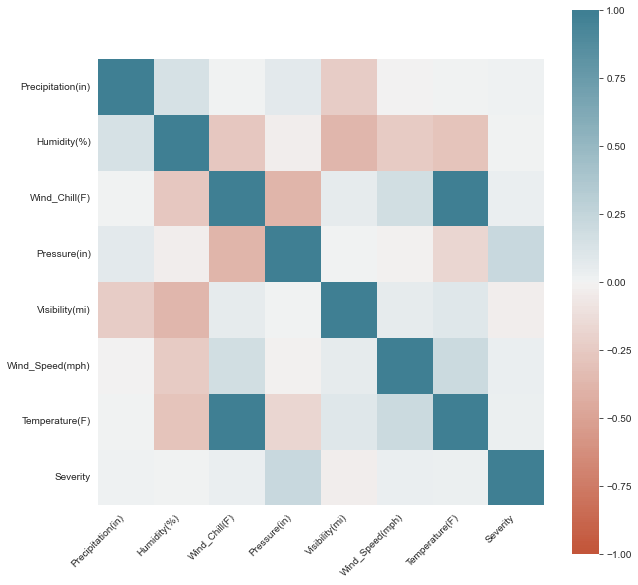

In [73]:
columns = ["Precipitation(in)", "Humidity(%)", "Wind_Chill(F)", "Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Temperature(F)","Severity"]

corr = df[columns].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


Severity of accidents is more correlated with pressure than any other atmospheric factor.

**Date/Location Exploration**

I wonder if frequencies of traffic incidents rises or falls YOY? MOM? Is it higher on certain days of the week?

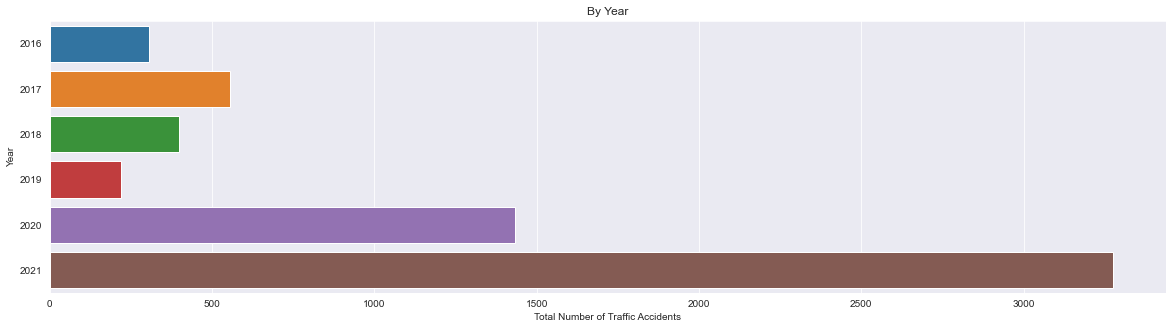

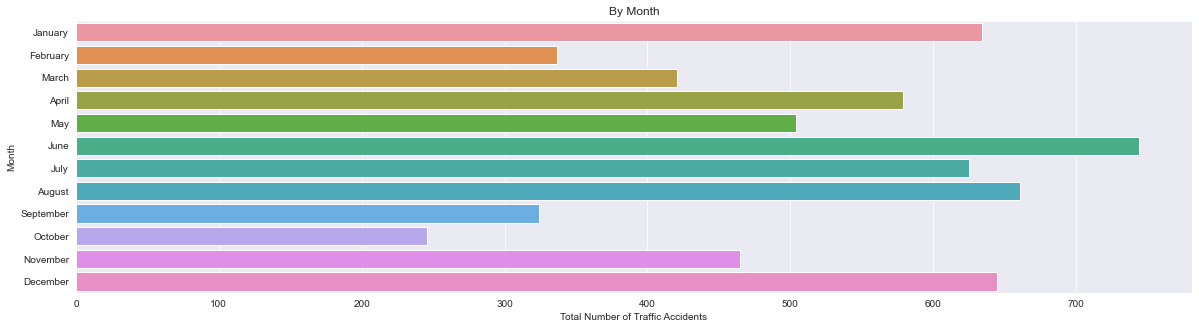

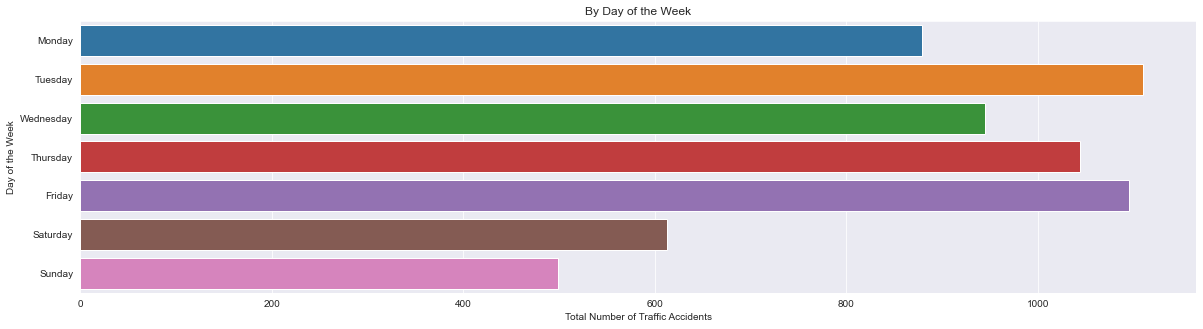

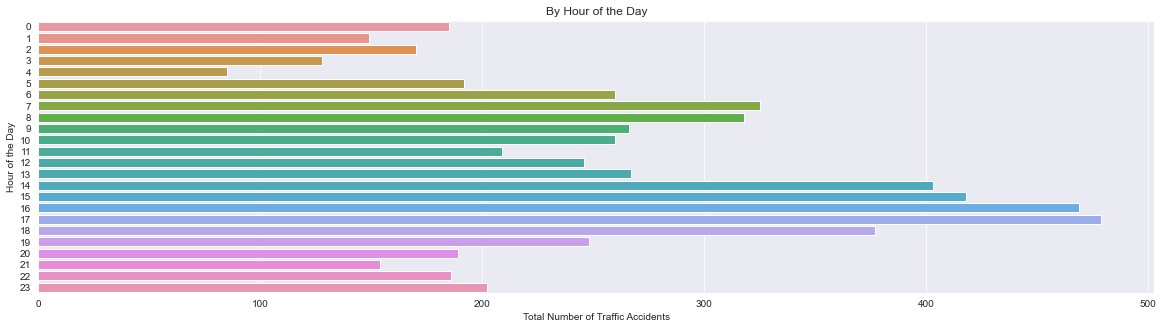

In [74]:
sns.countplot(y=df['STYear'])
plt.title("By Year")
plt.xlabel("Total Number of Traffic Accidents")
plt.ylabel("Year")
plt.show()

sns.countplot(y=df['STMonth'],order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title("By Month")
plt.xlabel("Total Number of Traffic Accidents")
plt.ylabel("Month")
plt.show()

sns.countplot(y=df['DayofWeek'],order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("By Day of the Week")
plt.xlabel("Total Number of Traffic Accidents")
plt.ylabel("Day of the Week")
plt.show()

sns.countplot(y=df['STHour'])
plt.title("By Hour of the Day")
plt.xlabel("Total Number of Traffic Accidents")
plt.ylabel("Hour of the Day")
plt.show()

Let's compare some factors & severity

In [75]:
df.groupby("STYear")["Severity"].agg([min, max, sum])

,min,max,sum
STYear,,,
2016,2,4,711
2017,2,4,1362
2018,2,4,1038
2019,2,4,575
2020,1,4,3291
2021,2,4,6600


2021 is definitely a year of more severe accidents. 
We need to find out if the most dangerous streets follow the year/month/day/hour trends seen above.

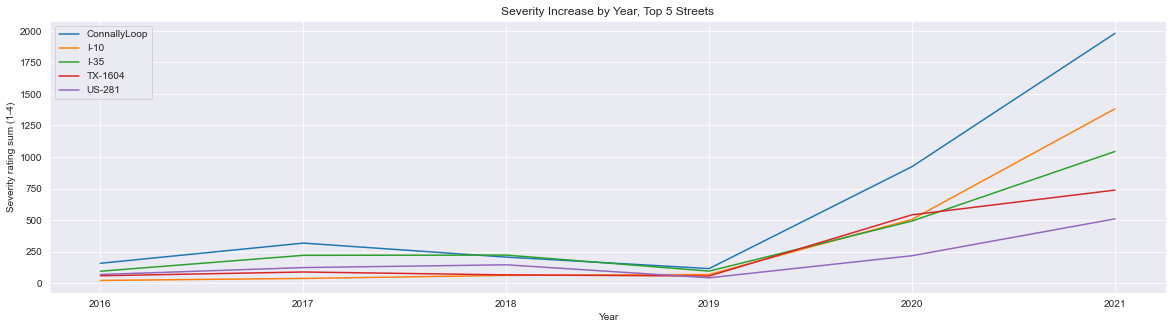

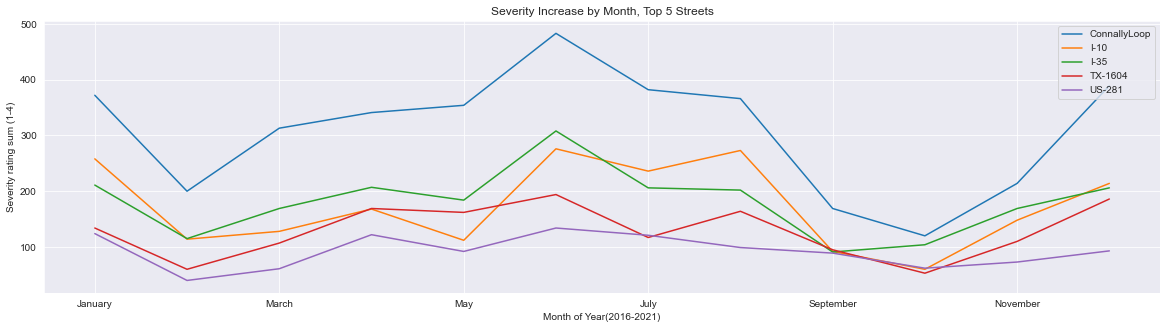

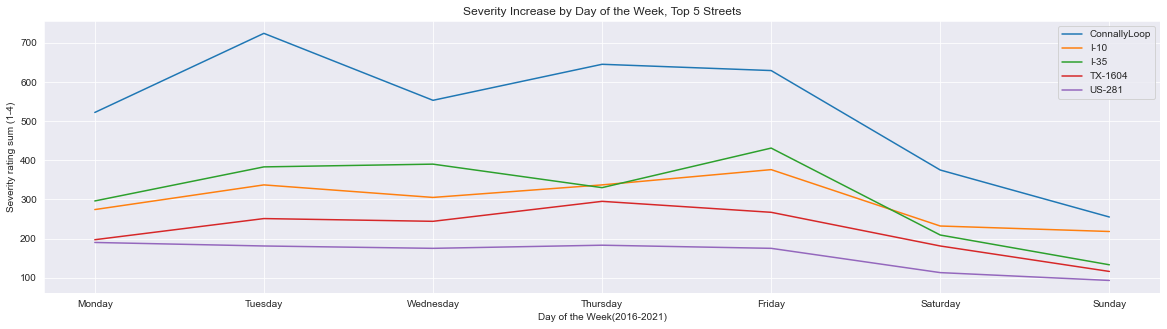

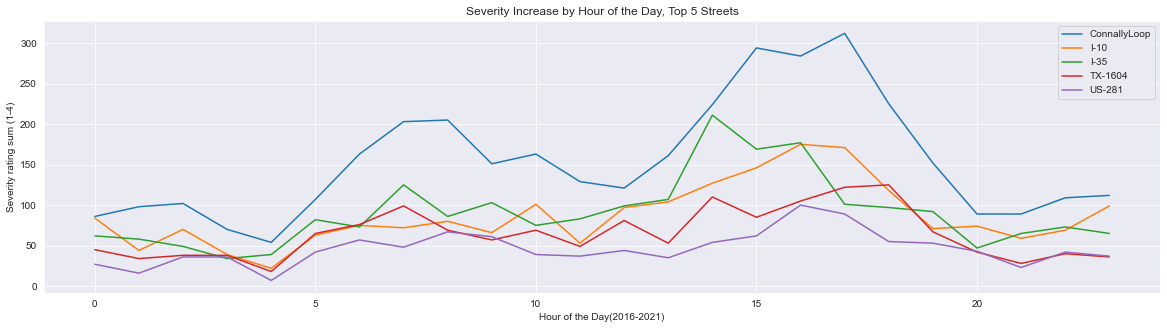

In [76]:
df[df["Street"] == "ConnallyLoop"].groupby("STYear")["Severity"].sum().plot(label='ConnallyLoop')
df[df["Street"] == "I-10"].groupby("STYear")["Severity"].sum().plot(label='I-10')
df[df["Street"] == "I-35"].groupby("STYear")["Severity"].sum().plot(label='I-35')
df[df["Street"] == "TX-1604"].groupby("STYear")["Severity"].sum().plot(label='TX-1604')
df[df["Street"] == "US-281"].groupby("STYear")["Severity"].sum().plot(label='US-281')
plt.legend()
plt.title("Severity Increase by Year, Top 5 Streets")
plt.ylabel("Severity rating sum (1-4)")
plt.xlabel("Year")
plt.show()

df[df["Street"] == "ConnallyLoop"].groupby("STMonth")["Severity"].sum().loc[['January','February','March','April','May','June','July','August','September','October','November','December']].plot(label='ConnallyLoop')
df[df["Street"] == "I-10"].groupby("STMonth")["Severity"].sum().loc[['January','February','March','April','May','June','July','August','September','October','November','December']].plot(label='I-10')
df[df["Street"] == "I-35"].groupby("STMonth")["Severity"].sum().loc[['January','February','March','April','May','June','July','August','September','October','November','December']].plot(label='I-35')
df[df["Street"] == "TX-1604"].groupby("STMonth")["Severity"].sum().loc[['January','February','March','April','May','June','July','August','September','October','November','December']].plot(label='TX-1604')
df[df["Street"] == "US-281"].groupby("STMonth")["Severity"].sum().loc[['January','February','March','April','May','June','July','August','September','October','November','December']].plot(label='US-281')
plt.legend()
plt.title("Severity Increase by Month, Top 5 Streets")
plt.ylabel("Severity rating sum (1-4)")
plt.xlabel("Month of Year(2016-2021)")
plt.show()

df[df["Street"] == "ConnallyLoop"].groupby('DayofWeek')["Severity"].sum().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(label='ConnallyLoop')
df[df["Street"] == "I-10"].groupby('DayofWeek')["Severity"].sum().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(label='I-10')
df[df["Street"] == "I-35"].groupby('DayofWeek')["Severity"].sum().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(label='I-35')
df[df["Street"] == "TX-1604"].groupby('DayofWeek')["Severity"].sum().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(label='TX-1604')
df[df["Street"] == "US-281"].groupby('DayofWeek')["Severity"].sum().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(label='US-281')
plt.legend()
plt.title("Severity Increase by Day of the Week, Top 5 Streets")
plt.ylabel("Severity rating sum (1-4)")
plt.xlabel("Day of the Week(2016-2021)")
plt.show()

df[df["Street"] == "ConnallyLoop"].groupby("STHour")["Severity"].sum().plot(label='ConnallyLoop')
df[df["Street"] == "I-10"].groupby("STHour")["Severity"].sum().plot(label='I-10')
df[df["Street"] == "I-35"].groupby("STHour")["Severity"].sum().plot(label='I-35')
df[df["Street"] == "TX-1604"].groupby("STHour")["Severity"].sum().plot(label='TX-1604')
df[df["Street"] == "US-281"].groupby("STHour")["Severity"].sum().plot(label='US-281')
plt.legend()
plt.title("Severity Increase by Hour of the Day, Top 5 Streets")
plt.ylabel("Severity rating sum (1-4)")
plt.xlabel("Hour of the Day(2016-2021)")
plt.show()

We see similar outputs of severity as with sum of all accidents across all areas with the **exception**  of severity and hour of the day. 

**Summary**

The most important factors of a traffic accident in San Antonio are pressure, street, month, day of the week, and time of day.